In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df_train = pd.read_csv('iris.csv', names=names)
df_test = pd.read_csv('iris.csv', names=names)

In [12]:
df_train

,sepal-length,sepal-width,petal-length,petal-width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.3,5.7,2.5,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
x_train = df_train.iloc[:, :-1].values 
y_train = df_train.iloc[:, 4].values
x_test = df_test.iloc[:, :-1].values 
y_test = df_test.iloc[:, 4].values

Масштабирование функций

In [14]:
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

Обучение

In [15]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Оценка

In [16]:
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[47  0  0]
 [ 0 45  2]
 [ 0  4 43]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        47
Iris-versicolor       0.92      0.96      0.94        47
 Iris-virginica       0.96      0.91      0.93        47

       accuracy                           0.96       141
      macro avg       0.96      0.96      0.96       141
   weighted avg       0.96      0.96      0.96       141



Изменение количества ошибок с изменением параметра количества соседей

In [17]:
error = [] 
for i in np.arange(1, 50):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_train, y_train)
    new_predictions = new_model.predict(x_test)
    error.append(np.mean(new_predictions != y_test))

Text(0, 0.5, 'Mean Error')

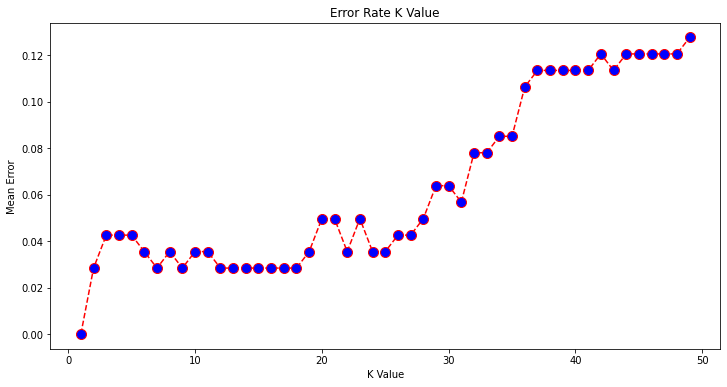

In [18]:
plt.figure(figsize=(12, 6)) 
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) 
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')